### 1. Data Preparation

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_excel('heart_disease.xlsx')

In [2]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


### 2. Exploratory Data Analysis (EDA)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None


In [5]:
# Check for missing values
print(data.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [6]:
# Handle missing values 
data.dropna(inplace=True)

In [7]:
# Describe the dataset
print(data.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  846.000000  846.000000  846.000000  846.000000  846.000000  846.000000
mean    53.425532  132.449173  202.652482  137.167849    0.891253    0.979905
std      9.099243   19.243667  111.654072   25.608434    1.093875    1.128783
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.000000  120.000000  177.250000  120.000000    0.000000    0.000000
50%     54.000000  130.000000  225.000000  140.000000    0.500000    1.000000
75%     60.000000  140.000000  269.750000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


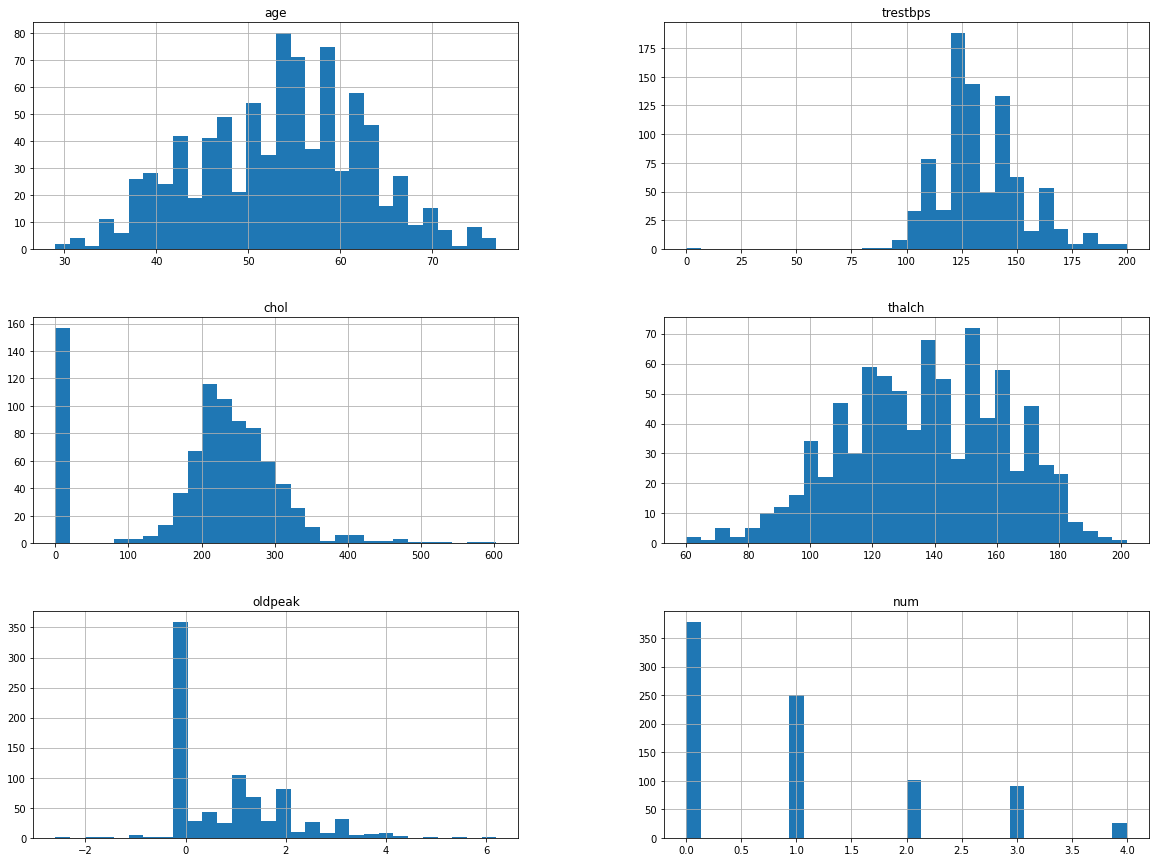

In [8]:
# Visualize the distribution of features
data.hist(bins=30, figsize=(20, 15))
plt.show()

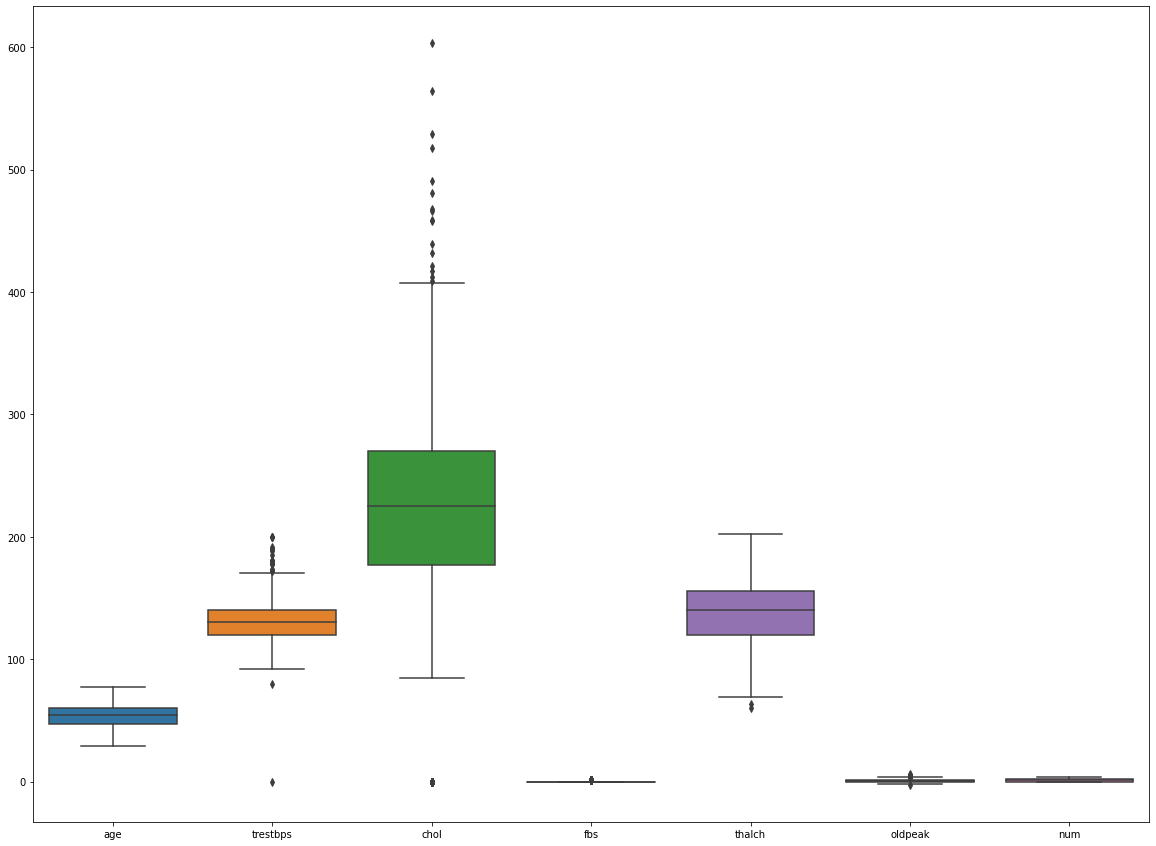

In [9]:
# Box plots to detect outliers
plt.figure(figsize=(20, 15))
sns.boxplot(data=data)
plt.show()

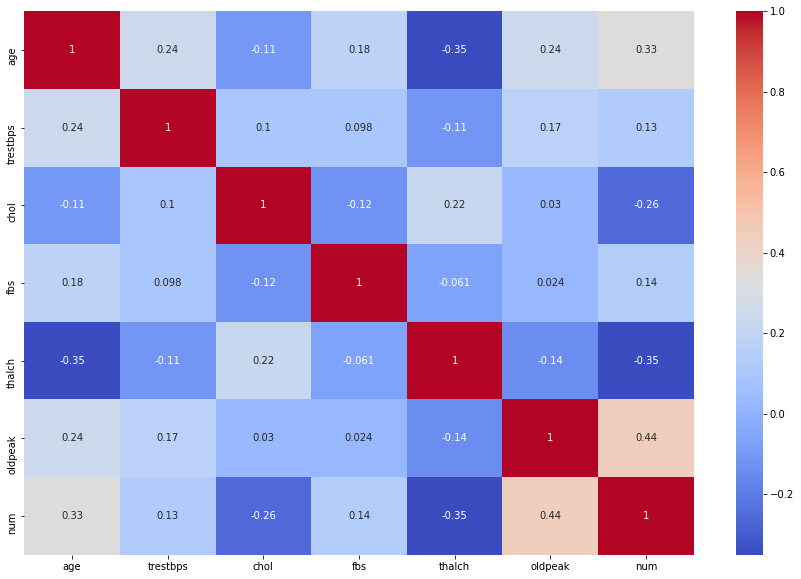

In [10]:
# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

### 3. Feature Engineering

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [12]:
# Ensure all categorical data types are strings
data['sex'] = data['sex'].astype(str)
data['cp'] = data['cp'].astype(str)
data['fbs'] = data['fbs'].astype(str)
data['restecg'] = data['restecg'].astype(str)
data['exang'] = data['exang'].astype(str)
data['slope'] = data['slope'].astype(str)
data['thal'] = data['thal'].astype(str)
data['num'] = data['num'].astype(int)  # target variable as integer

In [13]:
# Map target variable to binary classification: 0 (no heart disease) and 1 (heart disease)
data['num'] = data['num'].apply(lambda x: 0 if x == 0 else 1)

In [14]:
# Separate features and target variable
X = data.drop('num', axis=1)
y = data['num']

In [15]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

In [16]:
categorical_cols

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [17]:
numerical_cols

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak'], dtype='object')

In [18]:
# Define preprocessing steps for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [19]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [20]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Decision Tree Classification

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

In [23]:
# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(random_state=42))])

In [24]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
          

In [25]:
# Predict on the test set
y_pred = model.predict(X_test)

In [26]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7294117647058823
ROC-AUC: 0.7256944444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70        80
           1       0.72      0.79      0.76        90

    accuracy                           0.73       170
   macro avg       0.73      0.73      0.73       170
weighted avg       0.73      0.73      0.73       170



### 5. Hyperparameter Tuning:

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
# Define parameter grid
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__criterion': ['gini', 'entropy']
}

In [29]:
# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                

In [30]:
# Best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_split': 20}


In [31]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Accuracy: 0.7764705882352941
ROC-AUC: 0.7743055555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        80
           1       0.78      0.81      0.79        90

    accuracy                           0.78       170
   macro avg       0.78      0.77      0.77       170
weighted avg       0.78      0.78      0.78       170



### 6. Model Evaluation and Analysis:

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
# Extract feature names after preprocessing
# First get the names of the numerical columns
num_features = numerical_cols

In [40]:
# Then get the names of the one-hot encoded columns
cat_features = best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)

In [41]:
# Combine numerical and one-hot encoded feature names
all_features = np.concatenate([num_features, cat_features])

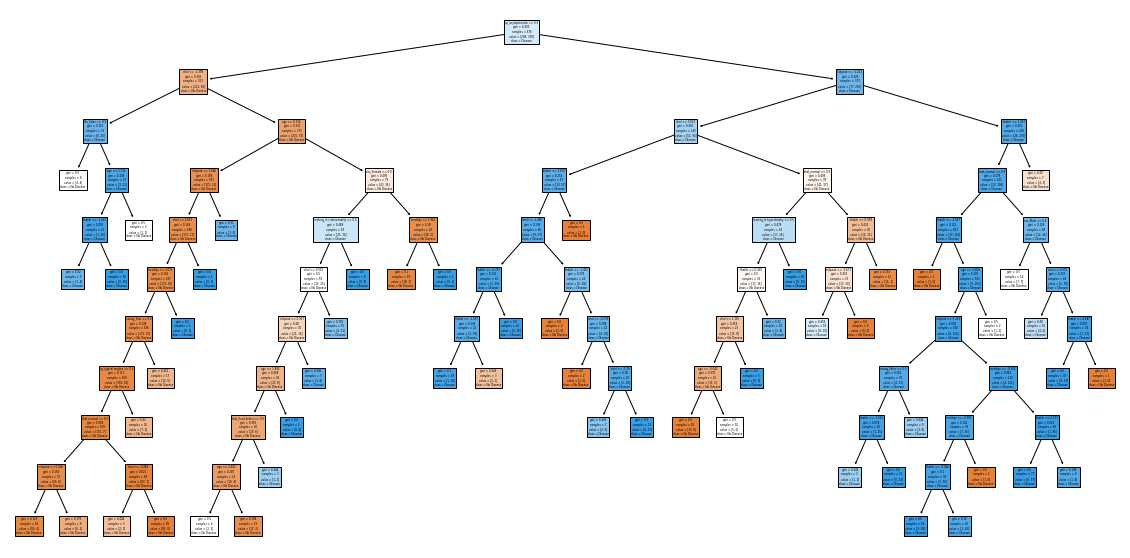

In [42]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model.named_steps['classifier'], filled=True, feature_names=all_features, class_names=['No Disease', 'Disease'])
plt.show()

In [44]:
# Get feature importances from the best model
importances = best_model.named_steps['classifier'].feature_importances_

In [45]:
# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

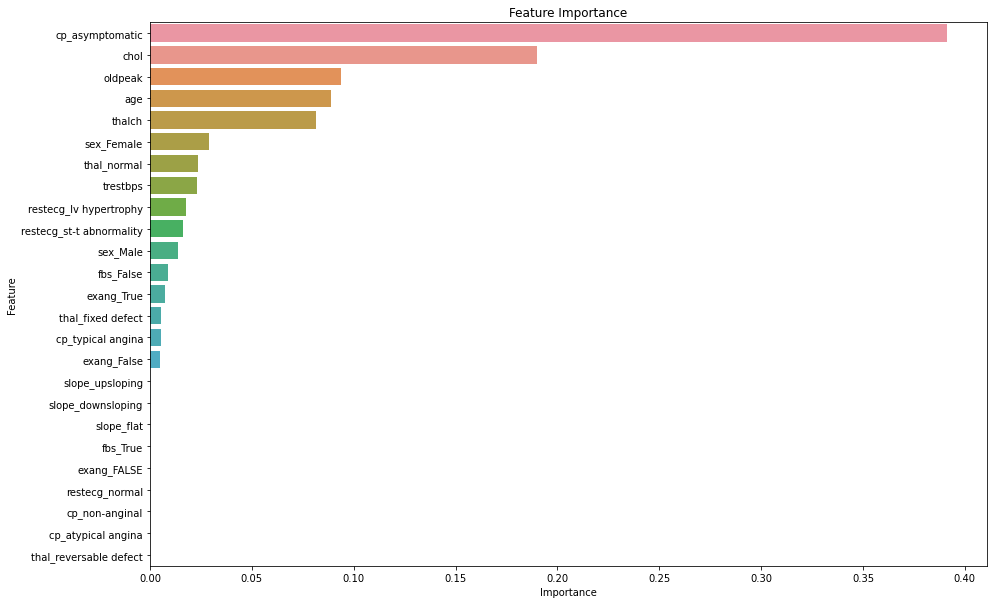

In [46]:
# Plot feature importances
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

### Interview Questions

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Max Depth: Controls the maximum depth of the tree. Deeper trees can capture more complex patterns but are prone to overfitting.

Min Samples Split: The minimum number of samples required to split an internal node. Higher values prevent splitting of nodes with insufficient samples, which can reduce overfitting.

Criterion: The function to measure the quality of a split. Common options are 'gini' for Gini impurity and 'entropy' for information gain. Different criteria can lead to different splits.

Min Samples Leaf: The minimum number of samples required to be at a leaf node. Similar to min_samples_split, it helps prevent overfitting by ensuring leaf nodes have enough samples.

2. What is the difference between Label encoding and One-hot encoding?

Label Encoding: Transforms categorical data into numerical labels. It assigns a unique number to each category. Suitable for ordinal data but can introduce unintended ordinal relationships in nominal data.

One-hot Encoding: Transforms categorical data into a series of binary columns, each representing a category. Suitable for nominal data as it does not imply any ordinal relationship. However, it increases the dimensionality of the dataset.